# 三角板目标检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

20230607

## 进入mmdetection主目录

In [2]:
import os
os.chdir('mmdetection')

In [3]:
!pwd

/e/openmmlab/MMPose_Tutorials/2023/0524/mmdetection


## 导入工具包

In [4]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [9]:
# 日志文件路径
# log_path = 'work_dirs/faster_r_cnn_triangle/20230511_234855/vis_data/scalars.json'

log_path = 'work_dirs/rtmdet_tiny_triangle/20231212_154635/vis_data/scalars.json'

In [10]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [11]:
len(json_list)

8657

In [12]:
eval(json_list[4])

{'base_lr': 1.6055855855855853e-05,
 'lr': 1.6055855855855853e-05,
 'data_time': 3.4006953716278074,
 'loss': 0.05020575076341629,
 'loss_cls': 0.03305597677826881,
 'loss_bbox': 0.017149773985147478,
 'time': 6.014917325973511,
 'epoch': 1,
 'iter': 5,
 'memory': 1439,
 'step': 5}

In [14]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████| 8657/8657 [00:06<00:00, 1343.81it/s]


In [15]:
df_train

,base_lr,lr,data_time,loss,loss_cls,loss_bbox,time,epoch,iter,memory,step
0,4.000000e-08,4.000000e-08,16.961921,0.040342,0.033121,0.007220,28.650793,1.0,1.0,1402.0,1.0
1,4.043964e-06,4.043964e-06,8.491242,0.041324,0.033126,0.008198,14.509613,1.0,2.0,1439.0,2.0
2,8.047928e-06,8.047928e-06,5.663160,0.043790,0.033128,0.010662,9.794581,1.0,3.0,1439.0,3.0
3,1.205189e-05,1.205189e-05,4.248987,0.044965,0.033095,0.011870,7.427967,1.0,4.0,1439.0,4.0
4,1.605586e-05,1.605586e-05,3.400695,0.050206,0.033056,0.017150,6.014917,1.0,5.0,1439.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8595,3.054004e-03,3.054004e-03,0.012084,0.322176,0.110557,0.211619,0.156572,200.0,8596.0,1439.0,8596.0
8596,3.053204e-03,3.053204e-03,0.012083,0.324535,0.111729,0.212805,0.156001,200.0,8597.0,1439.0,8597.0
8597,3.052403e-03,3.052403e-03,0.012063,0.328697,0.113112,0.215585,0.155751,200.0,8598.0,1439.0,8598.0
8598,3.051602e-03,3.051602e-03,0.012085,0.327915,0.112292,0.215624,0.155878,200.0,8599.0,1439.0,8599.0


In [16]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.057,0.226,0.003,-1.0,-1.0,0.057,0.553553,0.590791,5.0
1,0.373,0.828,0.256,-1.0,-1.0,0.373,0.065828,0.095679,10.0
2,0.514,0.927,0.517,-1.0,-1.0,0.514,0.066272,0.085453,15.0
3,0.458,0.872,0.552,-1.0,-1.0,0.458,0.063326,0.086294,20.0
4,0.449,0.935,0.286,-1.0,-1.0,0.449,0.067326,0.086086,25.0
5,0.651,0.969,0.857,-1.0,-1.0,0.651,0.063322,0.086413,30.0
6,0.653,0.965,0.833,-1.0,-1.0,0.653,0.065220,0.085921,35.0
7,0.605,0.963,0.666,-1.0,-1.0,0.605,0.063240,0.086012,40.0
8,0.708,0.976,0.889,-1.0,-1.0,0.708,0.067452,0.086860,45.0
9,0.749,0.973,0.921,-1.0,-1.0,0.749,0.063754,0.087094,50.0


## 导出训练日志表格

In [17]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [18]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [13]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

# import matplotlib 
# import matplotlib.pyplot as plt
# matplotlib.rc("font",family='SimHei') # 中文字体


--2023-05-12 08:45:29--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  22.5MB/s    用时 0.4s    

2023-05-12 08:45:30 (22.5 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



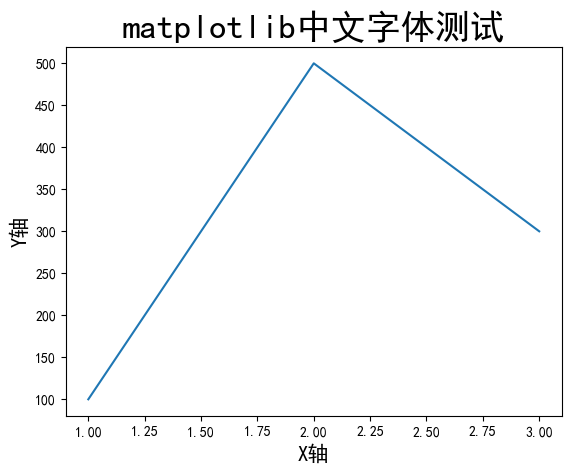

In [19]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [20]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [21]:
df_train.columns

Index(['base_lr', 'lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time',
       'epoch', 'iter', 'memory', 'step'],
      dtype='object')

In [22]:
metrics = ['loss', 'loss_bbox', 'loss_cls', 'loss_rpn_cls', 'loss_rpn_bbox']

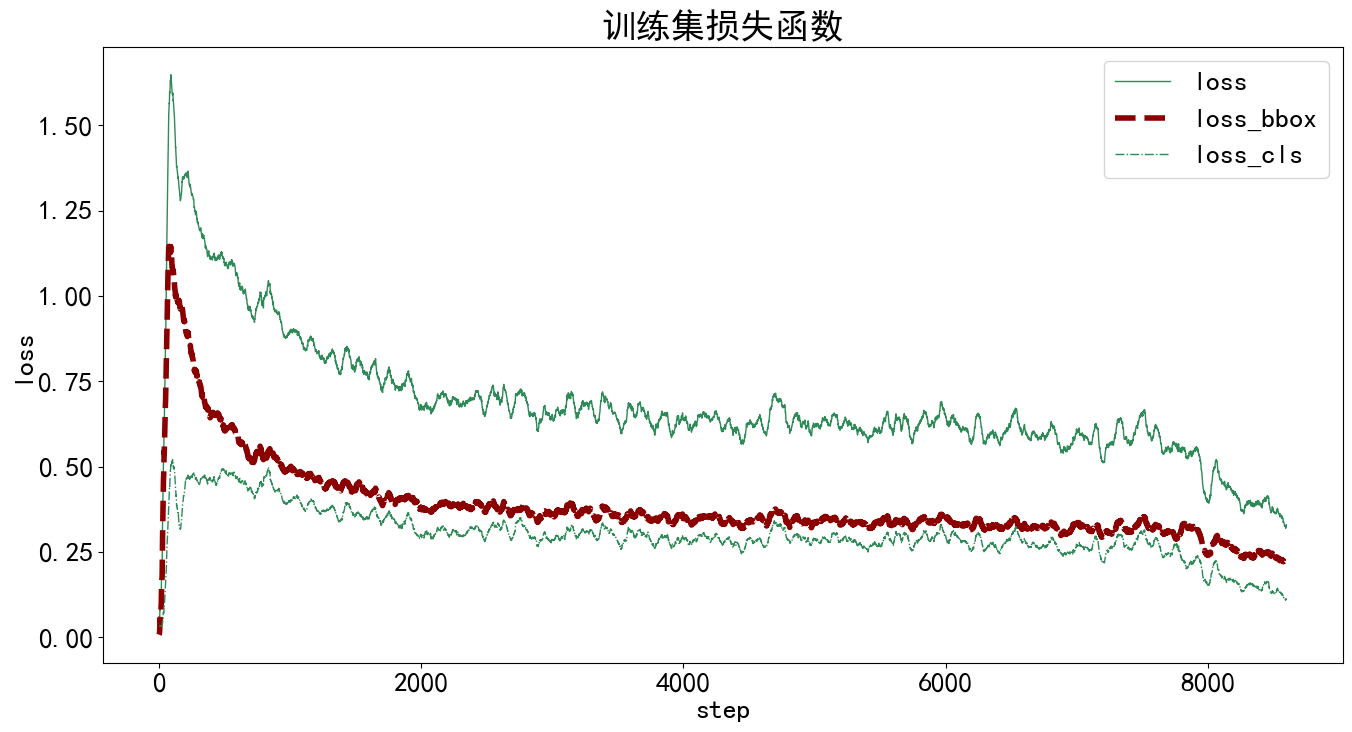

In [23]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率（如果图是空的，说明没有`acc`这个指标，跳过本图即可）

In [24]:
metrics = ['acc']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


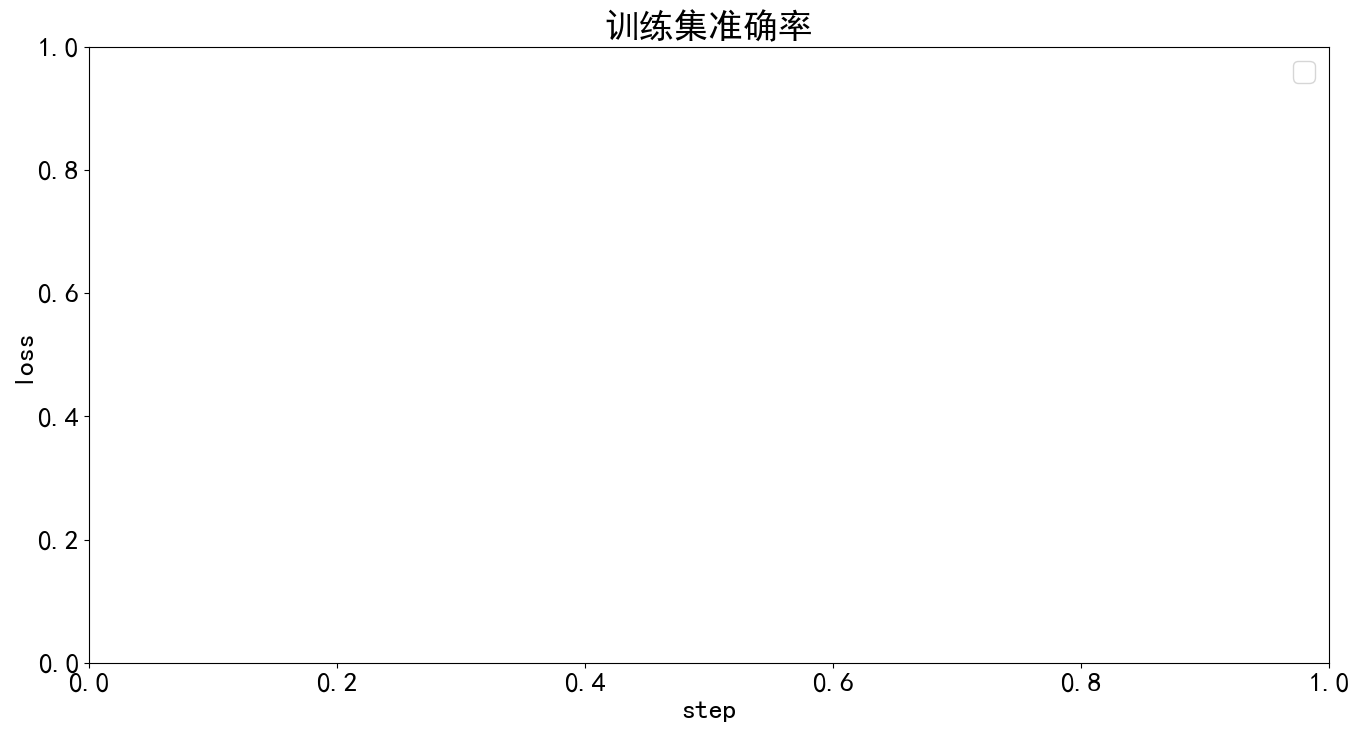

In [25]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [26]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')

In [27]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']

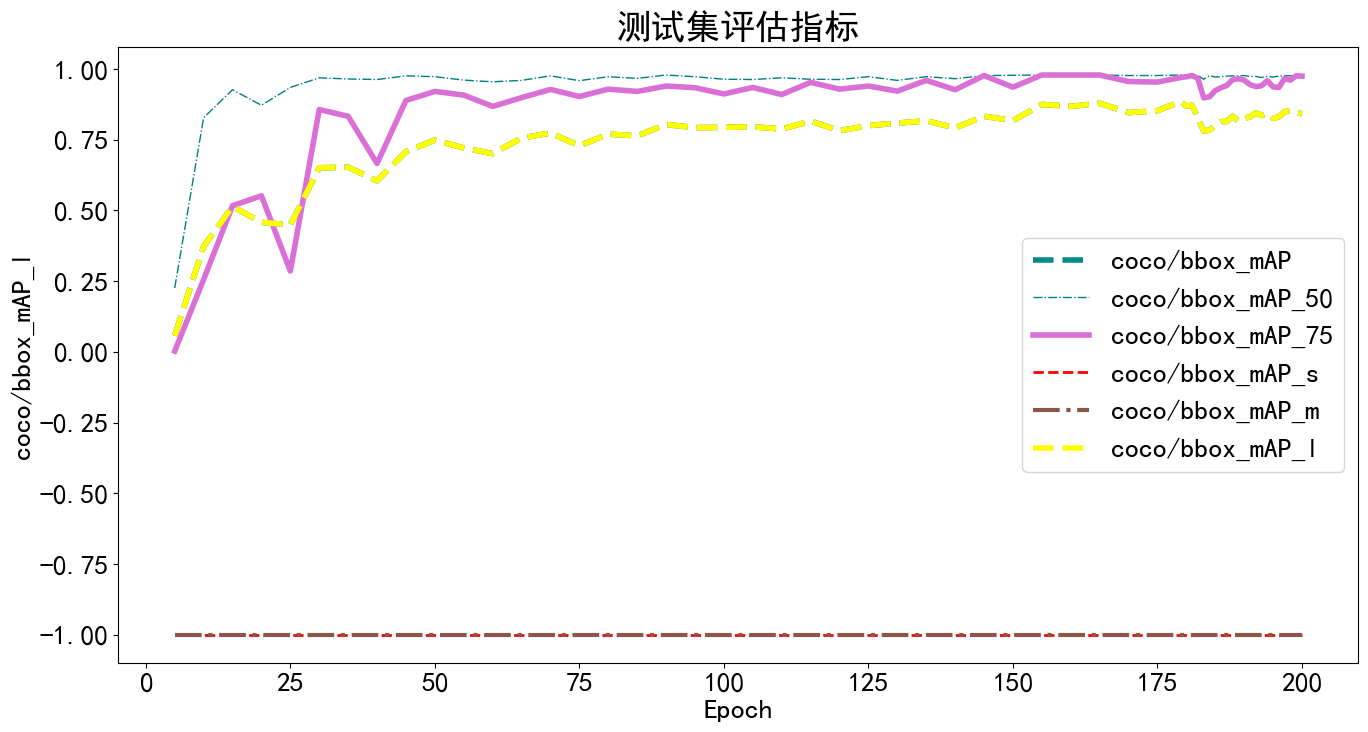

In [28]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-PASCAL VOC Metric（如果生成的图是空的，说明没有pascal voc指标，跳过本图即可）

In [29]:
metrics = ['pascal_voc/mAP', 'pascal_voc/AP50']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


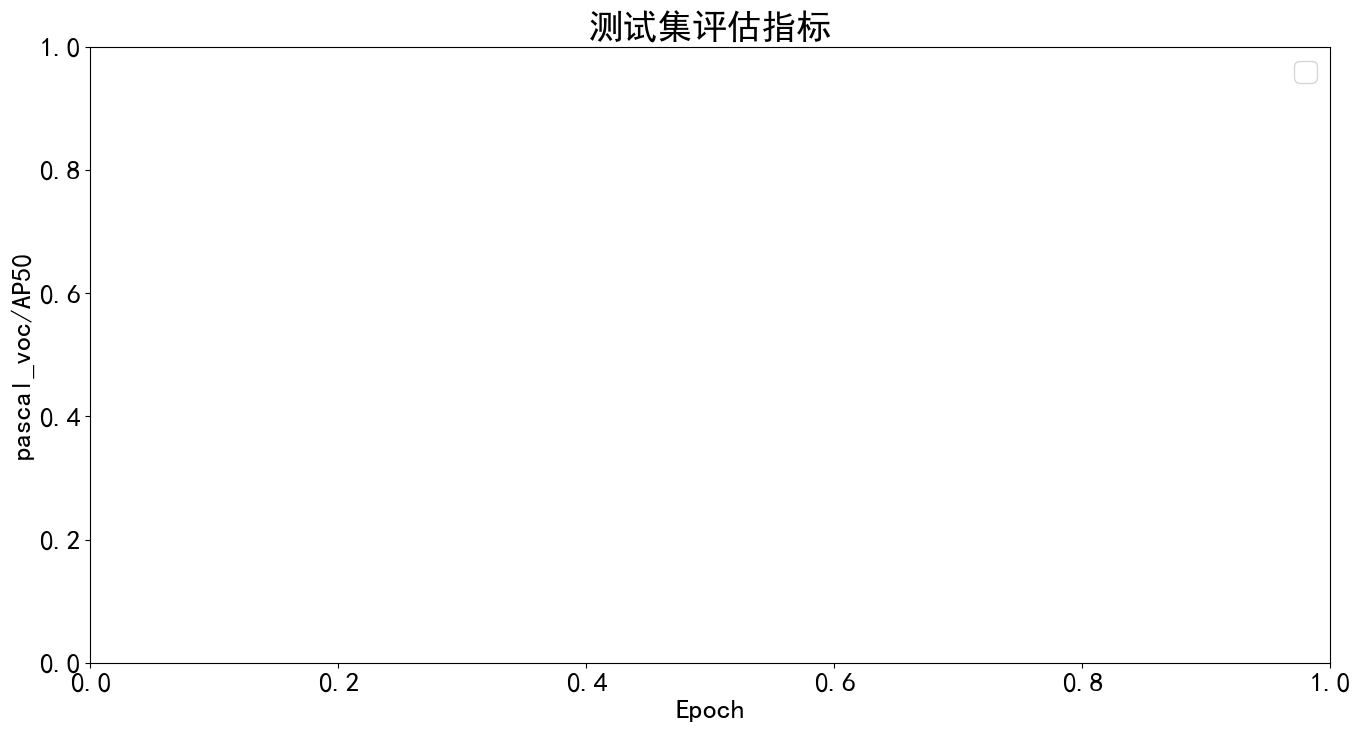

In [30]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()